In [3]:
#@title Librerías

import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import trapz
from scipy.integrate import simpson
from scipy.integrate import quad
import sympy as sy
import scipy as sp

# Parcial 2: 
### Curso: Metodos computacionales 
### Profesor: Hernán David Salinas Jiménez


La entrega del examen se debe realizar a traves del git-hub en el directorio de cada estudiante.


# Ecuaciones diferenciales


## Body Planet Orbits
1. (33%) Newton’s explanation of the motion of the planets in terms of a universal law of gravitation is one of the great achievements of science. He was able to prove that the planets traveled along elliptical paths with the sun at one vertex and to predict periods of the motion accurately. All Newton needed to postulate was that the force between a planet of mass $m$ and the sun of mass $M$ is

\begin{equation}
F^{(g)} = -\frac{GmM}{r^2}
\end{equation}

Here $r$ is the planet-CM distance, $G$ is the universal gravitational constant, and the attractive force lies along the line connecting the planet and the sun. The hard part for Newton was solving the resulting differential equations because he had to invent calculus to do it and then had go through numerous analytic manipulations. The numerical solution is straightforward since even for planets the equation of motion is still

\begin{equation}
\vec{f}=m\vec{a} = m \frac{\mathrm{d}^2\vec{r}}{\mathrm{d}t^2}
\end{equation}

with the force having components:

\begin{equation}
f_x  = F^{(g)}\cos \theta =  F^{(g)}\frac{x}{r}
\end{equation}


\begin{equation}
f_y  = F^{(g)}\sin \theta =  F^{(g)}\frac{y}{r}
\end{equation}

where 

\begin{equation}
r=\sqrt{x^2+y^2}
\end{equation}



The equation of motion yields two simultaneous second-order ODEs:

\begin{equation}
\frac{\mathrm{d}^2x}{\mathrm{d}t^2}=-GM \frac{x}{r^3}
\end{equation}

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2}=-GM \frac{y}{r^3}
\end{equation}


a. Solve the diferential equation with the next parameter:

Assume units such that GM = 1 and use the initial conditions x(0) = 0.5, y(0) = 0, vx(0) = 0.0, vy(0) = 1.63.

b. Realice a graph kind subplot with 1 row and 2 columns: in the first subplot include the graph: x vs t, y vs t and the second graph y vs x,  what is the conclusion of this results?.



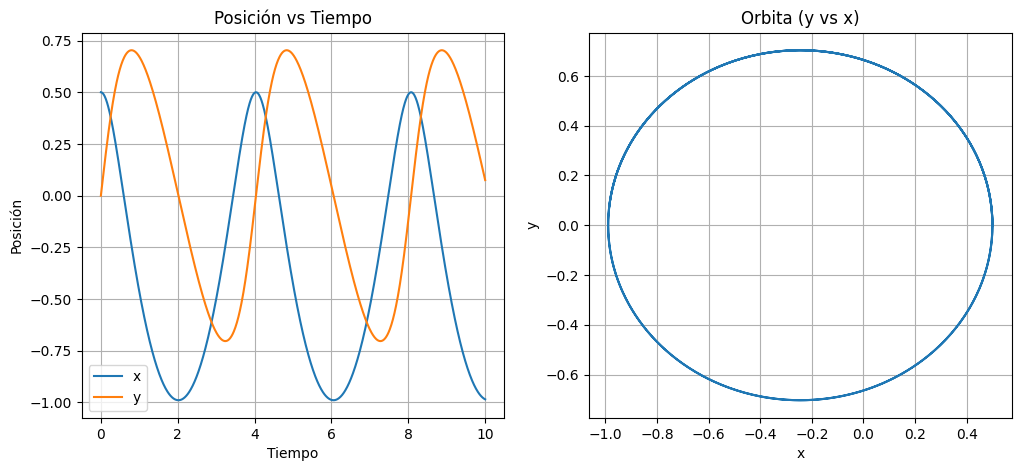

In [72]:
# se plantea la ecuacion diferencial
def f(t, u):
    x, y, vx, vy = u
    r = np.sqrt(x**2 + y**2)
    ax = -x / r**3
    ay = -y / r**3
    return np.array([vx, vy, ax, ay])

# se usa Runge-Kutta para resolver la ecuación diferncial
def runge_kutta(f, t0, u0, dt, N):
    t = np.zeros(N + 1)
    u = np.zeros((N + 1, 4))

    t[0] = t0
    u[0] = u0

    for i in range(0, N):
        k1 = dt * f(t[i], u[i])
        k2 = dt * f(t[i] + 0.5*dt, u[i] + 0.5*k1)
        k3 = dt * f(t[i] + 0.5*dt, u[i] + 0.5*k2)
        k4 = dt * f(t[i] + dt, u[i] + k3)

        t[i+1] = t[i] + dt
        u[i+1] = u[i] + (k1 + 2*k2 + 2*k3 + k4) / 6

    return t, u

# Parámetros iniciales
t0 = 0
u0 = np.array([0.5, 0, 0.0, 1.63])
dt = 0.01
N = 1000

# solucion de las ecuaciones diferenciales
t, u = runge_kutta(f, t0, u0, dt, N)

# coordenadas de posición
x = u[:, 0]
y = u[:, 1]

# gráfico con subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(t, x, label='x')
ax1.plot(t, y, label='y')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Posición')
ax1.set_title('Posición vs Tiempo')
ax1.grid()
ax1.legend()

ax2.plot(x, y)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Orbita (y vs x)')
ax2.grid()

Del resultado obtenido en la gráfica y vs x (segundo subplot), se puede concluir que la trayectoria del movimiento del cuerpo sigue una forma elíptica. Esto concuerda con las leyes de la gravitación universal de Newton, donde se establece que los planetas orbitan alrededor del Sol en trayectorias elípticas.

En la gráfica, se puede observar claramente la forma de una elipse, con el Sol ubicado en uno de los focos de la elipse. El cuerpo se mueve a lo largo de la elipse, lo que indica que experimenta una fuerza centrípeta hacia el centro de la elipse debido a la atracción gravitacional del Sol.

Esta conclusión es consistente con la explicación de Newton sobre la dinámica de los planetas en términos de la ley de la gravitación universal.


### Integracion 
2. (33%) Las [integrales elipticas](https://es.wikipedia.org/wiki/Integral_el%C3%ADptica#:~:text=Una%20integral%20el%C3%ADptica%20de%20primera,segundas%20dependen%20de%20dos%20variables) son integrales que permite dar solución a múltiples problemas en física y matemáticas. Algunos ejemplos de su uso, pueden ser encontrados en las siguientes referencias [[1]](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html)
[[2]](http://www.sc.ehu.es/sbweb/fisica_/numerico/integral/eliptica_ejemplos.html). El siguiente problema esta relacionado con al integración eliptica.


La [longitud de arco](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html) de  una elipse puede ser calculada a través de la siguiente integral.

\begin{equation}
L(k) = 4a\int_0^{\pi/2}  \mathrm{d} \phi \sqrt{1-k^2\sin^2 \phi}
\end{equation}

donde $ k^2 = \frac{a^2-b^2}{a^2} = \epsilon $, siendo $\epsilon$ la excentricidad de la elipse, a y b el semieje mayor y menor de la elipse respectivamente, $a>b$.

1. Para $b = 1$, y $a$ entre 1 y 100, construya un conjunto de valores de excentrecidades y realice la integración para cada excentrecidad.
Construya un grafico de $L$ vs $\epsilon$.

2. Determine la longitud de arco de la solucion del problema 1.



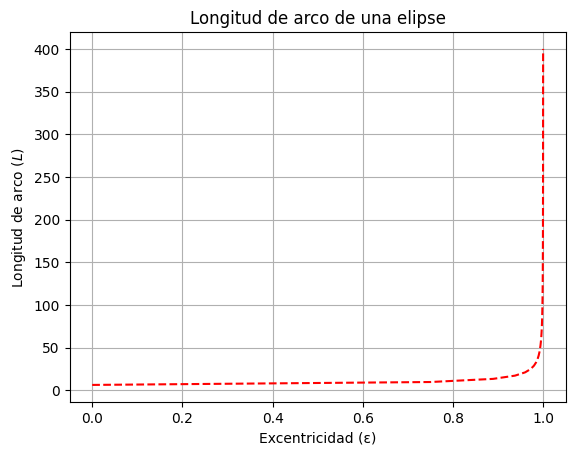

In [74]:
#@title Integración elíptica

# Parámetros iniciales
b = 1
a_valores = np.linspace(1, 100, 100)

# Función de integración
def integral(phi, a):
    k_cuad = (a**2 - b**2) / a**2
    return np.sqrt(1 - k_cuad * np.sin(phi)**2)

# Cálculo de la longitud de arco
arco_ = []
for a in a_valores:
    result, _ = quad(integral, 0, np.pi/2, args=(a,))
    arco = 4 * a * result
    arco_.append(arco)

# Gráfico de longitud de arco vs excentricidad

k = (a_valores**2 - b**2) / a_valores**2

plt.plot(k, arco_, "r--")
plt.xlabel('Excentricidad (ε)')
plt.ylabel('Longitud de arco ($L$)')
plt.title('Longitud de arco de una elipse')
plt.grid()

\begin{equation}
L = \int_{t_1}^{t_2} \sqrt{\left(\frac{{dx}}{{dt}}\right)^2 + \left(\frac{{dy}}{{dt}}\right)^2} \, dt
\end{equation}

En esta fórmula, L representa la longitud de arco, t es el parámetro que parametriza la curva, x y y son las coordenadas cartesianas de la curva, y $t_1$ y $t_2$ son los valores extremos del parámetro t en el intervalo de integración.

Esta fórmula nos permite calcular la longitud de arco de una curva en un sistema de coordenadas cartesianas, considerando las derivadas de x y y con respecto a t.

In [67]:
# Longitud de arco del problema 1

x = u[:, 0]
y = u[:, 1]

# se calcula la longitud de arco utilizando el método del trapecio
L = np.trapz(np.sqrt(np.gradient(x, t)**2 + np.gradient(y, t)**2), t)

print("Longitud de arco para el problema 1 es:", L)

Longitud de arco para el problema 1 es: 11.297173171122097



### Matrices: Rotación  en el plano, autovalores y autovectores
3 (33%).   Considere la siguiente matrix de rotación:
\begin{bmatrix} 
\cos \theta & -\sin \theta\\ 
\sin \theta & \cos \theta
\end{bmatrix}

a) Encontrar el polinomio característico

b) Encontrar los autovalores y autovectores

c) construya la matriz diagonal con los autovalores y autovectores y compruebe su solución. 

Encontrar los autovalores y autovectores para $\theta=45$.

In [36]:
''' Se plantea una matriz M '''

theta = 45

m1 = [np.cos(np.radians(theta)), - np.sin(np.radians(theta))]
m2 = [np.sin(np.radians(theta)), np.cos(np.radians(theta))]

M = np.array((m1, m2))
M

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [41]:
# Polinomio característico 

polinomio = np.poly(M)
print("Coeficientes del polinomio característico:", polinomio)

Coeficientes del polinomio característico: [ 1.         -1.41421356  1.        ]


In [46]:
# Se calculan los autovectores y autovalores de M

v = np.linalg.eigh(M) # se usa linalg.eigh porque son números complejos

print("Los autovalores de M son:", v[0])
print("Los autovectores de M son:", v[1])

Los autovalores de M son: [1.11022302e-16 1.41421356e+00]
Los autovectores de M son: [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


In [43]:
# Matriz diagonal

P = v[1]
P_inv = np.linalg.inv(P) 
P_inv

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [48]:
M_diag = P_inv @ M @ P
print("La matriz diagonal es")
print(M_diag)

La matriz diagonal es
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
